In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV

In [4]:
train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
#store the lengths
train_len= len(train)
test_len= len(test)

In [7]:
#concatenate both dataframes
df = pd.concat([train,test], axis= 0)
df.reset_index(drop=True,inplace = True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [9]:
print(len(train),len(test),len(df))

8523 5681 14204


In [10]:
#statistical info
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
#datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [12]:
#check unique value in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [13]:
#preprocessing the dataset

In [14]:
#check for null value
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [15]:
#check for the categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [16]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [18]:
#print the categorical 
for col in cat_col:
    print(col)
    print(df[col].value_counts())
print

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


<function print>

In [19]:
#fillthe missing value
item_weight_mean=df.pivot_table(values ="Item_Weight",index ='Item_Identifier')
item_weight_mean 


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [20]:
miss_bool = df['Item_Weight'].isnull()
miss_bool   

0        False
1        False
2        False
3        False
4        False
         ...  
14199    False
14200    False
14201    False
14202    False
14203    False
Name: Item_Weight, Length: 14204, dtype: bool

In [21]:
for i,item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
               df['Item_Weight'][i]=item_weight_mean.loc[item]['Item_Weight']
        else:
               df['Item_Weight'][i]=np.mean(df['Item_Weight'])


In [22]:
df['Item_Weight'].isnull().sum()

0

In [23]:
outlet_size_mode = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
                                                                                     
outlet_size_mode                                                                                      
                  

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [24]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x]) 

In [25]:
df['Outlet_Size'].isnull().sum()

0

In [27]:
sum(df['Item_Visibility']==0)

879

In [28]:
# replace 
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace = True)

In [29]:
sum(df['Item_Visibility']==0)

0

In [32]:
#combine item fat content
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [33]:
# creation of new attribute
df['New_Item_Type']= df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: New_Item_Type, Length: 14204, dtype: object

In [34]:
df['New_Item_Type']=df['New_Item_Type'].map({'FD':'Food','NC':'Non-consumable','DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              10201
Non-consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

In [35]:
df.loc[df['New_Item_Type']=='Non-consumable','Item_Fat_Content']='Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [36]:
# create small values for establishment year
df['Outlet_Years'] = 2013- df['Outlet_Establishment_Year']

In [37]:
df['Outlet_Years']

0        14
1         4
2        14
3        15
4        26
         ..
14199    16
14200     4
14201    11
14202     6
14203    11
Name: Outlet_Years, Length: 14204, dtype: int64

In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-consumable,26


In [39]:
##label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [41]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,1,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,0,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,1,14,9
3,FDX07,19.20,2,0.065953,6,182.0950,OUT010,1998,2,2,0,732.3800,1,15,0
4,NCD19,8.93,1,0.065953,9,53.8614,OUT013,1987,0,2,1,994.7052,2,26,1


In [42]:
train =df.iloc[:train_len,:]
test =df.iloc[:train_len,:]

In [43]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,1,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,0,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,1,14,9
3,FDX07,19.20,2,0.065953,6,182.0950,OUT010,1998,2,2,0,732.3800,1,15,0
4,NCD19,8.93,1,0.065953,9,53.8614,OUT013,1987,0,2,1,994.7052,2,26,1


In [45]:
test=test.drop(columns=['Item_Outlet_Sales'])
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,1,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,0,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,1,14,9
3,FDX07,19.20,2,0.065953,6,182.0950,OUT010,1998,2,2,0,1,15,0
4,NCD19,8.93,1,0.065953,9,53.8614,OUT013,1987,0,2,1,2,26,1


In [47]:
#input split
X = train.drop(columns=['Outlet_Identifier','Outlet_Establishment_Year','Item_Identifier','Item_Outlet_Sales'])
y =train['Item_Outlet_Sales']

In [48]:
# model trainning


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model,X,y):
    #train the model
    model.fit(X,y)
    #predicting the trainning set
    pred = model.predict(X)
    
    #perform Cross validation 
    cv_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error')
    
    print("Model Report")
    print("MSE :", mean_squared_error(y,pred))
    print("CV Score:",cv_score)
    

Model Report
MSE : 1444993.967871983
CV Score: [-1488024.9180333  -1398536.77847383 -1414999.84759065 -1453044.5683119
 -1494230.06432958]


<AxesSubplot:title={'center':'Model Coefficient'}>

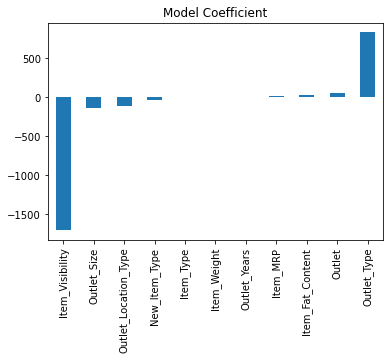

In [62]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
model = LinearRegression()
train(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar', title ='Model Coefficient')

Model Report
MSE : 1788033.2691956237
CV Score: [-1906300.9986593  -1732580.3099631  -1676644.91852701 -1807767.27992486
 -1829825.7166142 ]


<AxesSubplot:title={'center':'Model Coefficient'}>

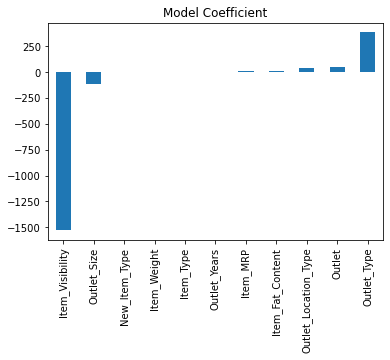

In [58]:
model = Ridge(normalize = True)
train(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar', title ='Model Coefficient')

Model Report
MSE : 1445458.690220283
CV Score: [-1487869.43010658 -1399382.38877793 -1417376.31391506 -1451691.711256
 -1494677.32347116]


<AxesSubplot:title={'center':'Model Coefficient'}>

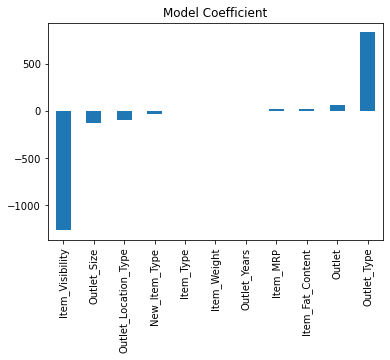

In [53]:
model = Lasso()
train(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar', title ='Model Coefficient')

Model Report
MSE : 0.0
CV Score: [-2378314.58448534 -2451342.61428738 -2563888.33005248 -2564459.37446279
 -2440585.91730321]


<AxesSubplot:title={'center':'Feature Importance'}>

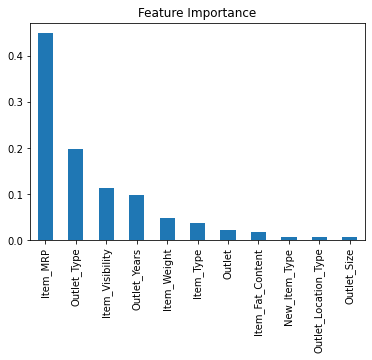

In [54]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,X,y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title ="Feature Importance")

Model Report
MSE : 182736.02216110248
CV Score: [-1328292.68081112 -1352632.97781143 -1328566.47491705 -1307824.45494772
 -1306358.96358222]


<AxesSubplot:title={'center':'Feature Importance'}>

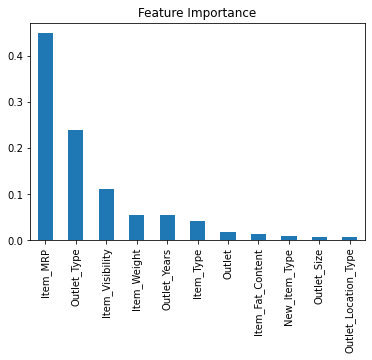

In [55]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model,X,y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title ="Feature Importance")


Model Report
MSE : 0.046521518352696
CV Score: [-1392197.90437359 -1440195.04741285 -1430515.07989605 -1382812.78421371
 -1403829.0955614 ]


<AxesSubplot:title={'center':'Feature Importance'}>

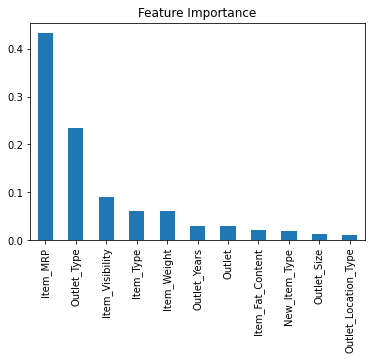

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model,X,y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title ="Feature Importance")

In [63]:
#prediction on test data


In [64]:
x_test = test.drop(columns=['Outlet_Identifier','Outlet_Establishment_Year','Item_Identifier'])
x_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,9.30,0,0.016047,4,249.8092,1,0,1,1,14,9
1,5.92,2,0.019278,14,48.2692,1,2,2,0,4,3
2,17.50,0,0.016760,10,141.6180,1,0,1,1,14,9
3,19.20,2,0.065953,6,182.0950,2,2,0,1,15,0
4,8.93,1,0.065953,9,53.8614,0,2,1,2,26,1


In [65]:
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

In [96]:
pred= model.predict(x_test)
pred

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [99]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(RandomForestRegressor)
 
# Load the pickled model
RFR_from_pickle = pickle.loads(saved_model)

